In [1]:
from TessTransient import TessTransient 

## Initialise event with estimated RA, Declination, Eventtime, and Associated Location Error. 

### Also good to feed in your own path for where to download.

In [4]:
event = TessTransient(ra=277.48,dec=61.78,eventtime=58951.381019,error=2,path='../../SampleTessTransient/',eventname='GRB200412B')

Event occured within TESS FoV!


In [5]:
event.download()   # download FITS files to path, can choose number={int} for a select number to sample.

100%|██████████| 144/144 [01:55<00:00,  1.24it/s]


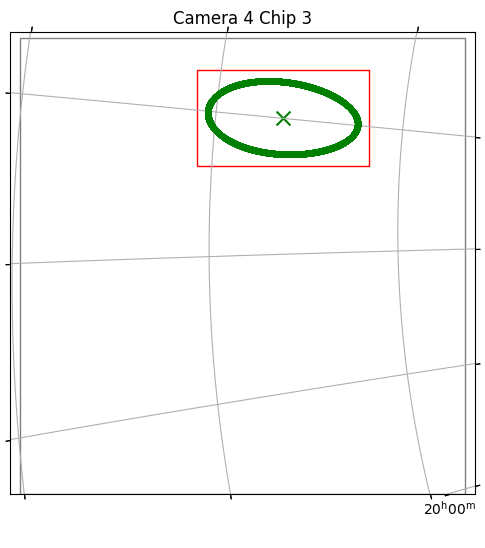

In [6]:
event.find_cuts()    # finds cut out of chip that encompasses given error region.

In [7]:
event.make_cube()     # forms a data cube from FITS files

Cubing


In [8]:
event.make_cuts()    # generate FITS files for each cut 

Cutting Cam 4 Chip 3 cut #1 (of 1)
Cam 4 Chip 3 cut 1 complete.






--Reduction Cam 4 Chip 3 Cut 1 (of 1)--
made reference
made source mask
calculating background
background subtracted
calculating centroids
!!Re-running for difference image!!
shifting images
remade mask
background


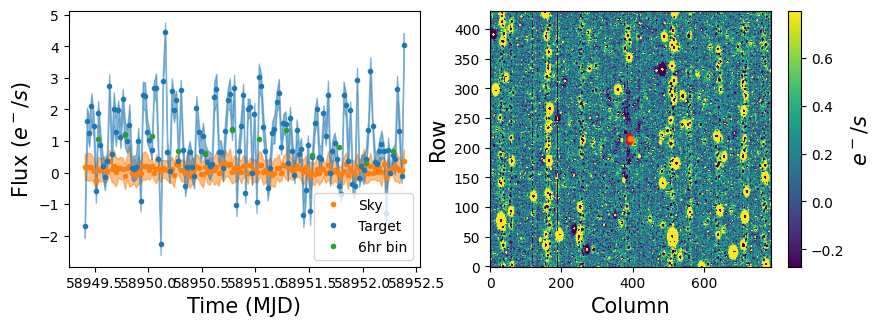

--Reduction Complete (Time: 2.56 mins)--
--Writing--
getting data
inputting data
writing data
--Writing Complete (Time: 2.64 mins)--




In [9]:
event.reduce()       # generate FITS files with reduced data for each cut

## This above process can be completed in entirety using event.full()

--COLLECTING DATA--
Getting Flux
Getting Time
--DONE--


Fetching Events


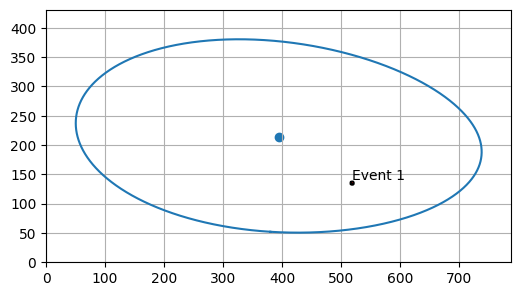

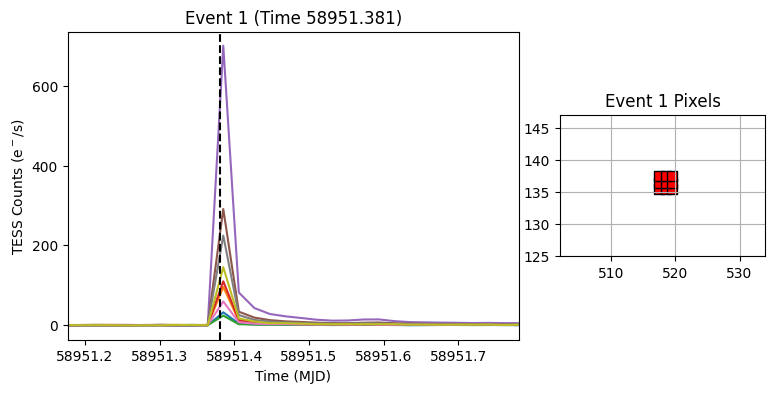

In [10]:
event.detect_events()

In [12]:
event.Detector.make_video(eventnumber=1)

Making Frames
Video Made


In [14]:
event.Detector.event_coords(eventnumber=1)

Cut WCS Coords: RA = 278.31171419817474, DEC = 62.53592801016973
Base WCS Coords: RA = 278.3173266699366, DEC = 62.52539979599132
